In [157]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split as TTS
from sklearn.metrics import mean_squared_error as MSE



In [158]:
#importing data
houses = pd.read_csv("kc_house_data.csv")
houses.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [159]:
#checking for null values
houses.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

<AxesSubplot:>

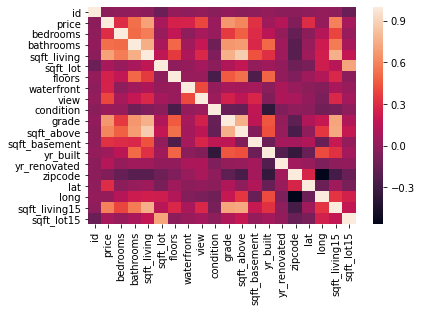

In [160]:
#finding most affecting variable
corr = houses.corr()
sns.heatmap(corr)

#sqft living and grade are most influencing

In [161]:
#creating x and y variables
x = np.array(houses['sqft_living'])     #input
y = np.array(houses['price'])           #output
x = x.reshape(-1,1)
y = y.reshape(-1,1)

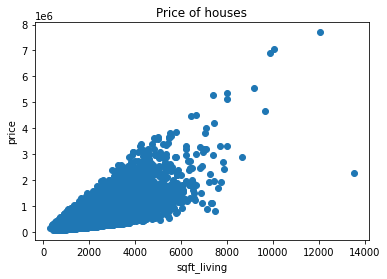

In [162]:
#visualization
plt.scatter(x,y)
plt.title('Price of houses')
plt.xlabel('sqft_living')
plt.ylabel("price")
plt.show()

In [163]:
#splitting for train and test
x_train, x_test, y_train, y_test = TTS( x, y, test_size = 0.3)

In [164]:
#fitting the model 
linreg = LinearRegression()
linreg.fit(x_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [165]:
#intercept and co-efficient
print(linreg.coef_.flatten() , linreg.intercept_)

[273.98461562] [-31044.60853005]


In [166]:
#making array of predicted data
y_predict = linreg.predict(x_test)
#making dataframe
d = { 'Value': x_test.flatten(), 'Prediction': y_predict.flatten() , 'Actual': y_test.flatten()}
df = pd.DataFrame(d, columns=['Value','Prediction','Actual'])
#Having a look at values 
df.head(10) 

Value    Prediction     Actual
0   1310  3.278752e+05   421000.0
1   2280  5.936403e+05   749700.0
2   3760  9.991375e+05  2230000.0
3   2310  6.018599e+05   524000.0
4    870  2.073220e+05   183000.0
5   2590  6.785755e+05   519995.0
6   1570  3.991112e+05   580000.0
7   4590  1.226545e+06  1710000.0
8   1530  3.881519e+05   546000.0
9   2850  7.498115e+05   710000.0

In [167]:
#Having a look at bottom values
df.tail(10)

Value    Prediction    Actual
6474   1830  4.703472e+05  378500.0
6475   1300  3.251354e+05  394950.0
6476   2680  7.032342e+05  475000.0
6477   2990  7.881694e+05  802541.0
6478   2210  5.744614e+05  719000.0
6479   2500  6.539169e+05  669500.0
6480    600  1.333462e+05  280000.0
6481    820  1.936228e+05  527550.0
6482   3420  9.059828e+05  925000.0
6483   3890  1.034756e+06  775000.0

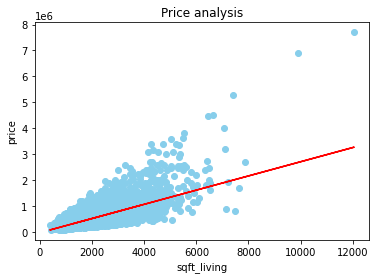

In [168]:
plt.scatter(x_test, y_test, color='skyblue')
plt.plot(x_test, y_predict, color='red')
plt.title('Price analysis')
plt.xlabel('sqft_living')
plt.ylabel("price")
plt.show()

In [169]:
mse = MSE(y_test, y_predict)
print(np.sqrt(mse))
print(linreg.score(x_test, y_test))

# our model is poor hahaha

272724.9755517678
0.5032016804484246
